# Predicting Movie Ratings - Random Forests

## Using genre as additional features
## Omitting Decision Tree and focus on Random Forests

#### In this notebook we will be building a Random Forests model with Natural Language processed plot data and genres as features to predict movies' Motion Picture Association rating.

In [3]:
# Dependencies
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /Users/ZTC/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/ZTC/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/ZTC/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [4]:
# Visualize more columns
pd.options.display.max_columns = None

# Load data

In [5]:
path = os.path.join('..', '..', 'resources','cleaned_data', 'movies_complete_cleaned.csv')
df = pd.read_csv(path)
# Drop Null values in `plot` column
df = df.dropna(axis='index', subset=['plot'])

df.head(2)

,name,production,director,runtime,released,year,month,country_kaggle,country_omdb,star_kaggle,actors_omdb,writer_kaggle,writers_omdb,language_omdb,plot,awards,score_imdb,votes_imdb,score_metacritic,budget,genre_kaggle,gross,genres_omdb,rating
0,Doctor Strange,Marvel Studios,Scott Derrickson,115,2016-11-04,2016,11,USA,USA,Benedict Cumberbatch,"Benedict Cumberbatch, Chiwetel Ejiofor, Rachel...",Jon Spaihts,"Jon Spaihts, Scott Derrickson, C. Robert Cargi...",English,"Marvel's ""Doctor Strange"" follows the story of...",Nominated for 1 Oscar. Another 19 wins & 67 no...,7.5,348307,72.0,165000000,Action,232641920,"Action, Adventure, Fantasy, Sci-Fi",PG-13
1,Sleight,Diablo Entertainment (II),J.D. Dillard,89,2017-04-28,2016,4,USA,USA,Jacob Latimore,"Jacob Latimore, Seychelle Gabriel, Storm Reid,...",J.D. Dillard,"J.D. Dillard, Alex Theurer",English,A young street magician (Jacob Latimore) is le...,3 nominations.,5.9,4012,62.0,250000,Action,3986245,"Crime, Drama, Sci-Fi",R


**Add a feature that's the length of the raw text.**

In [6]:
df['length'] = [len(x) for x in df['plot']]

In [7]:
df.head(2)

,name,production,director,runtime,released,year,month,country_kaggle,country_omdb,star_kaggle,actors_omdb,writer_kaggle,writers_omdb,language_omdb,plot,awards,score_imdb,votes_imdb,score_metacritic,budget,genre_kaggle,gross,genres_omdb,rating,length
0,Doctor Strange,Marvel Studios,Scott Derrickson,115,2016-11-04,2016,11,USA,USA,Benedict Cumberbatch,"Benedict Cumberbatch, Chiwetel Ejiofor, Rachel...",Jon Spaihts,"Jon Spaihts, Scott Derrickson, C. Robert Cargi...",English,"Marvel's ""Doctor Strange"" follows the story of...",Nominated for 1 Oscar. Another 19 wins & 67 no...,7.5,348307,72.0,165000000,Action,232641920,"Action, Adventure, Fantasy, Sci-Fi",PG-13,464
1,Sleight,Diablo Entertainment (II),J.D. Dillard,89,2017-04-28,2016,4,USA,USA,Jacob Latimore,"Jacob Latimore, Seychelle Gabriel, Storm Reid,...",J.D. Dillard,"J.D. Dillard, Alex Theurer",English,A young street magician (Jacob Latimore) is le...,3 nominations.,5.9,4012,62.0,250000,Action,3986245,"Crime, Drama, Sci-Fi",R,289


In [8]:
genres_path = os.path.join('..', '..', 'resources','cleaned_data', 'parsed_genres_table.csv')
df_genres = pd.read_csv(genres_path)

df_genres.head(2)

,name,genre_kaggle,genres_omdb,action,adventure,fantasy,sci-fi,crime,drama,history,comedy,biography,romance,horror,thriller,war,animation,family,sport,music,mystery,short,western,musical,documentary,film-noir,adult
0,Doctor Strange,Action,"Action, Adventure, Fantasy, Sci-Fi",1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Sleight,Action,"Crime, Drama, Sci-Fi",0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# Select initial features to work with

In [9]:
# Select features
df_plot = df[['name', 'plot', 'rating', 'length']]
full_df = pd.merge(df_genres, df_plot, on='name', how='inner')
full_df.drop(columns=['genre_kaggle', 'genres_omdb'], inplace=True)
full_df.head(2)

,name,action,adventure,fantasy,sci-fi,crime,drama,history,comedy,biography,romance,horror,thriller,war,animation,family,sport,music,mystery,short,western,musical,documentary,film-noir,adult,plot,rating,length
0,Doctor Strange,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"Marvel's ""Doctor Strange"" follows the story of...",PG-13,464
1,Sleight,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,A young street magician (Jacob Latimore) is le...,R,289


In [10]:
# Check if there's missing values
full_df.isna().any()

name           False
action         False
adventure      False
fantasy        False
sci-fi         False
crime          False
drama          False
history        False
comedy         False
biography      False
romance        False
horror         False
thriller       False
war            False
animation      False
family         False
sport          False
music          False
mystery        False
short          False
western        False
musical        False
documentary    False
film-noir      False
adult          False
plot           False
rating         False
length         False
dtype: bool

# Preprocessing - NLP - pt1

### Remove punctuations

In [11]:
import string

def remove_punct(text):
    table = str.maketrans("", "", string.punctuation)
    return text.translate(table)


punc_removed = full_df.copy()
punc_removed["punc_removed"] = [remove_punct(x) for x in punc_removed['plot']]

In [12]:
punc_removed.head(2)

,name,action,adventure,fantasy,sci-fi,crime,drama,history,comedy,biography,romance,horror,thriller,war,animation,family,sport,music,mystery,short,western,musical,documentary,film-noir,adult,plot,rating,length,punc_removed
0,Doctor Strange,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"Marvel's ""Doctor Strange"" follows the story of...",PG-13,464,Marvels Doctor Strange follows the story of th...
1,Sleight,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,A young street magician (Jacob Latimore) is le...,R,289,A young street magician Jacob Latimore is left...


### Tokenization

In [13]:
# Tokenization with `nltk.word_tokenize`
tokenized_df = punc_removed.copy()
tokenized_df['tokens'] = tokenized_df.\
    apply(lambda row: nltk.word_tokenize(row['punc_removed']), axis=1)

In [14]:
tokenized_df[['name', 'plot', 'punc_removed', 'tokens']].head(2)

,name,plot,punc_removed,tokens
0,Doctor Strange,"Marvel's ""Doctor Strange"" follows the story of...",Marvels Doctor Strange follows the story of th...,"[Marvels, Doctor, Strange, follows, the, story..."
1,Sleight,A young street magician (Jacob Latimore) is le...,A young street magician Jacob Latimore is left...,"[A, young, street, magician, Jacob, Latimore, ..."


### Stopwords removal

In [15]:
# Remove stopwords
from nltk.corpus import stopwords

stop = set(stopwords.words("english"))

def remove_stopwords(tokens):
    text = [word.lower() for word in tokens if word.lower() not in stop]
    return text

In [16]:
# Remove stopwords
filtered_df = tokenized_df.copy()

filtered_df["filtered"] = [remove_stopwords(x) for x in filtered_df["tokens"]]

In [17]:
filtered_df[['name', 'plot', 'punc_removed', 'tokens', 'filtered']].head(2)

,name,plot,punc_removed,tokens,filtered
0,Doctor Strange,"Marvel's ""Doctor Strange"" follows the story of...",Marvels Doctor Strange follows the story of th...,"[Marvels, Doctor, Strange, follows, the, story...","[marvels, doctor, strange, follows, story, tal..."
1,Sleight,A young street magician (Jacob Latimore) is le...,A young street magician Jacob Latimore is left...,"[A, young, street, magician, Jacob, Latimore, ...","[young, street, magician, jacob, latimore, lef..."


In [18]:
# Compare number of tokens pre- and post- stopwords removal
check_filter = filtered_df.copy()
check_filter['stopwords_filtered_out'] = ''

for index, row in check_filter.iterrows():
    token_count = len(check_filter.loc[index, 'tokens'])
    filtered_count = len(check_filter.loc[index, 'filtered'])
    check_filter.loc[index, 'stopwords_filtered_out'] = token_count - filtered_count

check_filter['stopwords_filtered_out'].value_counts()

27     133
24     132
32     129
31     128
22     128
      ... 
157      1
156      1
146      1
144      1
226      1
Name: stopwords_filtered_out, Length: 188, dtype: int64

In [19]:
check_filter[['name', 'tokens', 'filtered', 'stopwords_filtered_out']].head(3)

,name,tokens,filtered,stopwords_filtered_out
0,Doctor Strange,"[Marvels, Doctor, Strange, follows, the, story...","[marvels, doctor, strange, follows, story, tal...",24
1,Sleight,"[A, young, street, magician, Jacob, Latimore, ...","[young, street, magician, jacob, latimore, lef...",27
2,Silence,"[The, story, of, two, Catholic, missionaries, ...","[story, two, catholic, missionaries, andrew, g...",18


### Word Normalization with Lemmatization

Reduce inflection in words to their root forms and ensure the root form belongs to English.

In [20]:
# Lemmatization
from nltk.stem import WordNetLemmatizer

wordnet_lemmatizer = WordNetLemmatizer()

def stemming(stopwords_removed):
    text = [wordnet_lemmatizer.lemmatize(word) for word in stopwords_removed]
    return text

In [21]:
stemmed_df = filtered_df.copy()
stemmed_df['stemmed'] = [stemming(x) for x in stemmed_df['filtered']]

In [22]:
stemmed_df[['name', 'plot', 'punc_removed', 'tokens', 'filtered', 'stemmed']].head(2)

,name,plot,punc_removed,tokens,filtered,stemmed
0,Doctor Strange,"Marvel's ""Doctor Strange"" follows the story of...",Marvels Doctor Strange follows the story of th...,"[Marvels, Doctor, Strange, follows, the, story...","[marvels, doctor, strange, follows, story, tal...","[marvel, doctor, strange, follows, story, tale..."
1,Sleight,A young street magician (Jacob Latimore) is le...,A young street magician Jacob Latimore is left...,"[A, young, street, magician, Jacob, Latimore, ...","[young, street, magician, jacob, latimore, lef...","[young, street, magician, jacob, latimore, lef..."


# Encoding

In [23]:
# Check labels distribution
stemmed_df['rating'].value_counts()

R        3071
PG-13    1812
PG        883
G         128
NC-17      19
Name: rating, dtype: int64

**There is very little data on the rating "NC-17" and "G" compared with "R" and "PG-13". We will remove NC-17.**

In [24]:
filt_nc = stemmed_df['rating'] != 'NC-17'
stemmed_df = stemmed_df.loc[filt_nc]

In [25]:
# Encode 'rating'
# ---------------
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

label_encoder.fit(stemmed_df['rating'])
rating_encoded = stemmed_df.copy()
rating_encoded['rating'] = label_encoder.transform(rating_encoded['rating'])

In [26]:
# Check success
rating_original = pd.DataFrame(stemmed_df['rating'].value_counts()).reset_index()
rating_new = pd.DataFrame(rating_encoded['rating'].value_counts()).reset_index()
merged_rating = pd.merge(rating_original, rating_new, on='rating')
merged_rating = merged_rating.rename(columns={'rating': 'count',
                                              'index_x': 'rating',
                                              'index_y': 'label'
                                             })[['rating', 'label', 'count']]
merged_rating

,rating,label,count
0,R,3,3071
1,PG-13,2,1812
2,PG,1,883
3,G,0,128


Set target names for classification report

In [27]:
# Check class categories
classes = list(label_encoder.classes_)
classes

['G', 'PG', 'PG-13', 'R']

In [28]:
# Set target names
target_names = classes
target_names

['G', 'PG', 'PG-13', 'R']

# Select final features

In [29]:
features_df = stemmed_df.drop(columns=['name', 'plot',
                                       'punc_removed', 'tokens', 'filtered'])

In [30]:
# Set features as X and output as y
features_df = features_df.drop("rating", axis=1)

In [31]:
features_df.head(1)

,action,adventure,fantasy,sci-fi,crime,drama,history,comedy,biography,romance,horror,thriller,war,animation,family,sport,music,mystery,short,western,musical,documentary,film-noir,adult,length,stemmed
0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,464,"[marvel, doctor, strange, follows, story, tale..."


**We will be using sklearn's HashingVectorizer and TfidfTransformer to vectorize our plot NLP feature and scale by accounting for inverse document-frequency. Thus it's necessary to work with strings of plot objects instead of lists of tokenized plot objects.**

In [32]:
# Function to turn tokenized/filtered/Lemmatized list of words back to plot
def tokens_to_plot(tokens_list):
    plot = str(tokens_list).replace('[', '').replace(']', '').replace(',', '').replace("'", '')
    return plot

**Define X and y**

In [33]:
X = features_df.copy()
X['stemmed'] = [tokens_to_plot(x) for x in X['stemmed']]

y = rating_encoded['rating'].values.reshape(-1, 1)
y = rating_encoded['rating'].values.reshape(-1, )

print(X.shape, y.shape)

(5894, 26) (5894,)


In [34]:
X.head(2)

,action,adventure,fantasy,sci-fi,crime,drama,history,comedy,biography,romance,horror,thriller,war,animation,family,sport,music,mystery,short,western,musical,documentary,film-noir,adult,length,stemmed
0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,464,marvel doctor strange follows story talented n...
1,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,289,young street magician jacob latimore left care...


# Create a Train Test Split

In [35]:
# Split train and test
from sklearn.model_selection import train_test_split

# Save the original labeled classes
labeled_y = stemmed_df['rating'].values.reshape(-1, 1)

# We will create an unvectorized train and test split sets too for testing purposes...
features_train, features_test, labeled_y_train, labeled_y_test = train_test_split(features_df, labeled_y, random_state=42)

# Actual data split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [36]:
print(X_train.shape)
print(y_train.shape)

(4420, 26)
(4420,)


In [61]:
# Define feature names for feature importances
feature_names = list(X_train.columns)
feature_names

['action',
 'adventure',
 'fantasy',
 'sci-fi',
 'crime',
 'drama',
 'history',
 'comedy',
 'biography',
 'romance',
 'horror',
 'thriller',
 'war',
 'animation',
 'family',
 'sport',
 'music',
 'mystery',
 'short',
 'western',
 'musical',
 'documentary',
 'film-noir',
 'adult',
 'length',
 'stemmed']

# Preprocessing - NLP - pt2

## TF-IDF-Vectorize plot data

In [37]:
X_train.head(1)

,action,adventure,fantasy,sci-fi,crime,drama,history,comedy,biography,romance,horror,thriller,war,animation,family,sport,music,mystery,short,western,musical,documentary,film-noir,adult,length,stemmed
1035,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,376,parent death jacob jankowski left penniless ho...


In [38]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()

# If we use the plot and the genre as the features
# Make a copy for vecorized data
X_train_tfidf = X_train.copy().drop(columns='stemmed')
X_test_tfidf = X_test.copy().drop(columns='stemmed')

# Fit with train
X_train_tfidf['tfidf_vectorized'] = vectorizer.fit_transform(X_train['stemmed'])
# Transform test
X_test_tfidf['tfidf_vectorized'] = vectorizer.transform(X_test['stemmed']) # transform only...

### Convert features other than the vectorized plot data (genres and length) into a matrix

So that we can later join tfidf_vectorized with the genre and length data.

In [39]:
import scipy
from scipy.sparse import csr_matrix

# Matrix conversion
features_mat_train = csr_matrix(X_train_tfidf.iloc[:, :-1].values)
features_mat_test = csr_matrix(X_test_tfidf.iloc[:, :-1].values)

In [40]:
features_mat_train.toarray()

array([[   0,    0,    0, ...,    0,    0,  376],
       [   0,    1,    0, ...,    0,    0, 1077],
       [   0,    0,    0, ...,    0,    0, 1362],
       ...,
       [   0,    0,    0, ...,    0,    0,  182],
       [   0,    0,    0, ...,    0,    0,  216],
       [   0,    0,    0, ...,    0,    0,  631]])

### Join tfidf_vectorized with the converted matrix

In [41]:
# Get the plot only data as a matrix as well for joining
X_train_plot_only = vectorizer.fit_transform(X_train['stemmed'])
X_test_plot_only = vectorizer.transform(X_test['stemmed']) # transform only...

In [42]:
# Join matrices
from scipy.sparse import hstack

X_train_with_genres = hstack([features_mat_train, X_train_plot_only])
X_test_with_genres = hstack([features_mat_test, X_test_plot_only])

In [43]:
X_train_with_genres

<4420x26822 sparse matrix of type '<class 'numpy.float64'>'
	with 223797 stored elements in COOrdinate format>

Validation...

In [44]:
# Test to see if the combined matrix with genre, length, and plot data worked
print([x for x in X_train_with_genres.toarray()[0].tolist() if x != 0])
print([x for x in X_train_with_genres.toarray()[1].tolist() if x != 0])

[1.0, 1.0, 376.0, 0.1098033602995272, 0.3900715627736618, 0.11620949234471986, 0.12267042720687812, 0.21096479045655606, 0.17780049614092763, 0.09834394651199359, 0.11971112816866741, 0.12225667896016754, 0.14501390806143835, 0.06575030556786744, 0.11400246067221245, 0.16960868942399537, 0.12124912857632231, 0.3623848305631871, 0.23579625440437982, 0.18723960189704125, 0.10473309329573763, 0.1131089736865019, 0.08024795973241312, 0.23579625440437982, 0.10993333648994974, 0.18959760879988224, 0.21096479045655606, 0.1539427890593824, 0.14407933325016856, 0.09476775772836082, 0.19218051312417997, 0.18723960189704125, 0.1850704458194541, 0.13355449427390473, 0.10903632842533419, 0.08938378512698705, 0.11238626462382494]
[1.0, 1.0, 1.0, 1.0, 1.0, 1077.0, 0.05449897979598542, 0.04962602695468612, 0.06486763090360406, 0.04145246792982052, 0.046132067387602914, 0.06518967678551799, 0.05540906305226113, 0.13811859247378214, 0.04126124453442222, 0.05413066523757891, 0.05925612451620117, 0.078785

<hr>

# Train the Model

**Decision Tree**

In [45]:
from sklearn.tree import DecisionTreeClassifier

dt_model_genre = DecisionTreeClassifier(random_state=42, class_weight='balanced')

In [46]:
# Fit
dt_model_genre.fit(X_train_with_genres, y_train)

DecisionTreeClassifier(class_weight='balanced', random_state=42)

In [47]:
# Evaluation
print(f'Training Data Score: {round(dt_model_genre.score(X_train_with_genres, y_train), 4)}')
print(f'Testing Data Score: {round(dt_model_genre.score(X_test_with_genres, y_test), 4)}')

Training Data Score: 0.9989
Testing Data Score: 0.5237


**Random Forests**

In [74]:
from sklearn.ensemble import RandomForestClassifier

rf_model_genre = RandomForestClassifier(n_estimators=3000, verbose=2,
                                        random_state=42, class_weight='balanced')

In [75]:
# Fit
rf_model_genre.fit(X_train_with_genres, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 3000


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


building tree 2 of 3000
building tree 3 of 3000
building tree 4 of 3000
building tree 5 of 3000
building tree 6 of 3000
building tree 7 of 3000
building tree 8 of 3000
building tree 9 of 3000
building tree 10 of 3000
building tree 11 of 3000
building tree 12 of 3000
building tree 13 of 3000
building tree 14 of 3000
building tree 15 of 3000
building tree 16 of 3000
building tree 17 of 3000
building tree 18 of 3000
building tree 19 of 3000
building tree 20 of 3000
building tree 21 of 3000
building tree 22 of 3000
building tree 23 of 3000
building tree 24 of 3000
building tree 25 of 3000
building tree 26 of 3000
building tree 27 of 3000
building tree 28 of 3000
building tree 29 of 3000
building tree 30 of 3000
building tree 31 of 3000
building tree 32 of 3000
building tree 33 of 3000
building tree 34 of 3000
building tree 35 of 3000
building tree 36 of 3000
building tree 37 of 3000
building tree 38 of 3000
building tree 39 of 3000
building tree 40 of 3000
building tree 41 of 3000
building

building tree 322 of 3000
building tree 323 of 3000
building tree 324 of 3000
building tree 325 of 3000
building tree 326 of 3000
building tree 327 of 3000
building tree 328 of 3000
building tree 329 of 3000
building tree 330 of 3000
building tree 331 of 3000
building tree 332 of 3000
building tree 333 of 3000
building tree 334 of 3000
building tree 335 of 3000
building tree 336 of 3000
building tree 337 of 3000
building tree 338 of 3000
building tree 339 of 3000
building tree 340 of 3000
building tree 341 of 3000
building tree 342 of 3000
building tree 343 of 3000
building tree 344 of 3000
building tree 345 of 3000
building tree 346 of 3000
building tree 347 of 3000
building tree 348 of 3000
building tree 349 of 3000
building tree 350 of 3000
building tree 351 of 3000
building tree 352 of 3000
building tree 353 of 3000
building tree 354 of 3000
building tree 355 of 3000
building tree 356 of 3000
building tree 357 of 3000
building tree 358 of 3000
building tree 359 of 3000
building tre

building tree 640 of 3000
building tree 641 of 3000
building tree 642 of 3000
building tree 643 of 3000
building tree 644 of 3000
building tree 645 of 3000
building tree 646 of 3000
building tree 647 of 3000
building tree 648 of 3000
building tree 649 of 3000
building tree 650 of 3000
building tree 651 of 3000
building tree 652 of 3000
building tree 653 of 3000
building tree 654 of 3000
building tree 655 of 3000
building tree 656 of 3000
building tree 657 of 3000
building tree 658 of 3000
building tree 659 of 3000
building tree 660 of 3000
building tree 661 of 3000
building tree 662 of 3000
building tree 663 of 3000
building tree 664 of 3000
building tree 665 of 3000
building tree 666 of 3000
building tree 667 of 3000
building tree 668 of 3000
building tree 669 of 3000
building tree 670 of 3000
building tree 671 of 3000
building tree 672 of 3000
building tree 673 of 3000
building tree 674 of 3000
building tree 675 of 3000
building tree 676 of 3000
building tree 677 of 3000
building tre

building tree 956 of 3000
building tree 957 of 3000
building tree 958 of 3000
building tree 959 of 3000
building tree 960 of 3000
building tree 961 of 3000
building tree 962 of 3000
building tree 963 of 3000
building tree 964 of 3000
building tree 965 of 3000
building tree 966 of 3000
building tree 967 of 3000
building tree 968 of 3000
building tree 969 of 3000
building tree 970 of 3000
building tree 971 of 3000
building tree 972 of 3000
building tree 973 of 3000
building tree 974 of 3000
building tree 975 of 3000
building tree 976 of 3000
building tree 977 of 3000
building tree 978 of 3000
building tree 979 of 3000
building tree 980 of 3000
building tree 981 of 3000
building tree 982 of 3000
building tree 983 of 3000
building tree 984 of 3000
building tree 985 of 3000
building tree 986 of 3000
building tree 987 of 3000
building tree 988 of 3000
building tree 989 of 3000
building tree 990 of 3000
building tree 991 of 3000
building tree 992 of 3000
building tree 993 of 3000
building tre

building tree 1265 of 3000
building tree 1266 of 3000
building tree 1267 of 3000
building tree 1268 of 3000
building tree 1269 of 3000
building tree 1270 of 3000
building tree 1271 of 3000
building tree 1272 of 3000
building tree 1273 of 3000
building tree 1274 of 3000
building tree 1275 of 3000
building tree 1276 of 3000
building tree 1277 of 3000
building tree 1278 of 3000
building tree 1279 of 3000
building tree 1280 of 3000
building tree 1281 of 3000
building tree 1282 of 3000
building tree 1283 of 3000
building tree 1284 of 3000
building tree 1285 of 3000
building tree 1286 of 3000
building tree 1287 of 3000
building tree 1288 of 3000
building tree 1289 of 3000
building tree 1290 of 3000
building tree 1291 of 3000
building tree 1292 of 3000
building tree 1293 of 3000
building tree 1294 of 3000
building tree 1295 of 3000
building tree 1296 of 3000
building tree 1297 of 3000
building tree 1298 of 3000
building tree 1299 of 3000
building tree 1300 of 3000
building tree 1301 of 3000
b

building tree 1572 of 3000
building tree 1573 of 3000
building tree 1574 of 3000
building tree 1575 of 3000
building tree 1576 of 3000
building tree 1577 of 3000
building tree 1578 of 3000
building tree 1579 of 3000
building tree 1580 of 3000
building tree 1581 of 3000
building tree 1582 of 3000
building tree 1583 of 3000
building tree 1584 of 3000
building tree 1585 of 3000
building tree 1586 of 3000
building tree 1587 of 3000
building tree 1588 of 3000
building tree 1589 of 3000
building tree 1590 of 3000
building tree 1591 of 3000
building tree 1592 of 3000
building tree 1593 of 3000
building tree 1594 of 3000
building tree 1595 of 3000
building tree 1596 of 3000
building tree 1597 of 3000
building tree 1598 of 3000
building tree 1599 of 3000
building tree 1600 of 3000
building tree 1601 of 3000
building tree 1602 of 3000
building tree 1603 of 3000
building tree 1604 of 3000
building tree 1605 of 3000
building tree 1606 of 3000
building tree 1607 of 3000
building tree 1608 of 3000
b

building tree 1877 of 3000
building tree 1878 of 3000
building tree 1879 of 3000
building tree 1880 of 3000
building tree 1881 of 3000
building tree 1882 of 3000
building tree 1883 of 3000
building tree 1884 of 3000
building tree 1885 of 3000
building tree 1886 of 3000
building tree 1887 of 3000
building tree 1888 of 3000
building tree 1889 of 3000
building tree 1890 of 3000
building tree 1891 of 3000
building tree 1892 of 3000
building tree 1893 of 3000
building tree 1894 of 3000
building tree 1895 of 3000
building tree 1896 of 3000
building tree 1897 of 3000
building tree 1898 of 3000
building tree 1899 of 3000
building tree 1900 of 3000
building tree 1901 of 3000
building tree 1902 of 3000
building tree 1903 of 3000
building tree 1904 of 3000
building tree 1905 of 3000
building tree 1906 of 3000
building tree 1907 of 3000
building tree 1908 of 3000
building tree 1909 of 3000
building tree 1910 of 3000
building tree 1911 of 3000
building tree 1912 of 3000
building tree 1913 of 3000
b

building tree 2182 of 3000
building tree 2183 of 3000
building tree 2184 of 3000
building tree 2185 of 3000
building tree 2186 of 3000
building tree 2187 of 3000
building tree 2188 of 3000
building tree 2189 of 3000
building tree 2190 of 3000
building tree 2191 of 3000
building tree 2192 of 3000
building tree 2193 of 3000
building tree 2194 of 3000
building tree 2195 of 3000
building tree 2196 of 3000
building tree 2197 of 3000
building tree 2198 of 3000
building tree 2199 of 3000
building tree 2200 of 3000
building tree 2201 of 3000
building tree 2202 of 3000
building tree 2203 of 3000
building tree 2204 of 3000
building tree 2205 of 3000
building tree 2206 of 3000
building tree 2207 of 3000
building tree 2208 of 3000
building tree 2209 of 3000
building tree 2210 of 3000
building tree 2211 of 3000
building tree 2212 of 3000
building tree 2213 of 3000
building tree 2214 of 3000
building tree 2215 of 3000
building tree 2216 of 3000
building tree 2217 of 3000
building tree 2218 of 3000
b

building tree 2487 of 3000
building tree 2488 of 3000
building tree 2489 of 3000
building tree 2490 of 3000
building tree 2491 of 3000
building tree 2492 of 3000
building tree 2493 of 3000
building tree 2494 of 3000
building tree 2495 of 3000
building tree 2496 of 3000
building tree 2497 of 3000
building tree 2498 of 3000
building tree 2499 of 3000
building tree 2500 of 3000
building tree 2501 of 3000
building tree 2502 of 3000
building tree 2503 of 3000
building tree 2504 of 3000
building tree 2505 of 3000
building tree 2506 of 3000
building tree 2507 of 3000
building tree 2508 of 3000
building tree 2509 of 3000
building tree 2510 of 3000
building tree 2511 of 3000
building tree 2512 of 3000
building tree 2513 of 3000
building tree 2514 of 3000
building tree 2515 of 3000
building tree 2516 of 3000
building tree 2517 of 3000
building tree 2518 of 3000
building tree 2519 of 3000
building tree 2520 of 3000
building tree 2521 of 3000
building tree 2522 of 3000
building tree 2523 of 3000
b

building tree 2793 of 3000
building tree 2794 of 3000
building tree 2795 of 3000
building tree 2796 of 3000
building tree 2797 of 3000
building tree 2798 of 3000
building tree 2799 of 3000
building tree 2800 of 3000
building tree 2801 of 3000
building tree 2802 of 3000
building tree 2803 of 3000
building tree 2804 of 3000
building tree 2805 of 3000
building tree 2806 of 3000
building tree 2807 of 3000
building tree 2808 of 3000
building tree 2809 of 3000
building tree 2810 of 3000
building tree 2811 of 3000
building tree 2812 of 3000
building tree 2813 of 3000
building tree 2814 of 3000
building tree 2815 of 3000
building tree 2816 of 3000
building tree 2817 of 3000
building tree 2818 of 3000
building tree 2819 of 3000
building tree 2820 of 3000
building tree 2821 of 3000
building tree 2822 of 3000
building tree 2823 of 3000
building tree 2824 of 3000
building tree 2825 of 3000
building tree 2826 of 3000
building tree 2827 of 3000
building tree 2828 of 3000
building tree 2829 of 3000
b

[Parallel(n_jobs=1)]: Done 3000 out of 3000 | elapsed:  3.2min finished


RandomForestClassifier(class_weight='balanced', n_estimators=3000,
                       random_state=42, verbose=2)

In [76]:
# Evaluation
print(f'Training Data Score: {round(rf_model_genre.score(X_train_with_genres, y_train), 4)}')
print(f'Testing Data Score: {round(rf_model_genre.score(X_test_with_genres, y_test), 4)}')

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 3000 out of 3000 | elapsed:   13.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


Training Data Score: 0.9989
Testing Data Score: 0.656


[Parallel(n_jobs=1)]: Done 3000 out of 3000 | elapsed:    3.5s finished


*We will be focusing on the Random Forests model in the notebook that incorporates the genre as an additional feature since it has a higher score.*

<hr>

# Hyperparameter Tuning

Use `GridSearchCV` to tune the model's parameters

*Parameter tune the Decision Tree model*

In [104]:
# # Create the GridSearchCV model
# from sklearn.model_selection import GridSearchCV

# # Try different numbers of trees
# param_grid = {
#     'criterion': ['gini', 'entropy'],
#     'min_samples_split': [2, 8, 16, 32],
#     'min_samples_leaf': [1, 2, 8, 16, 32]
# }

# grid_dt_genre = GridSearchCV(dt_model_genre, param_grid, verbose=3)

In [105]:
# # See which parameters we can tune
# grid_dt_genre.get_params()

{'cv': None,
 'error_score': nan,
 'estimator__ccp_alpha': 0.0,
 'estimator__class_weight': 'balanced',
 'estimator__criterion': 'gini',
 'estimator__max_depth': None,
 'estimator__max_features': None,
 'estimator__max_leaf_nodes': None,
 'estimator__min_impurity_decrease': 0.0,
 'estimator__min_impurity_split': None,
 'estimator__min_samples_leaf': 1,
 'estimator__min_samples_split': 2,
 'estimator__min_weight_fraction_leaf': 0.0,
 'estimator__random_state': 42,
 'estimator__splitter': 'best',
 'estimator': DecisionTreeClassifier(class_weight='balanced', random_state=42),
 'n_jobs': None,
 'param_grid': {'criterion': ['gini', 'entropy'],
  'min_samples_split': [2, 8, 16, 32],
  'min_samples_leaf': [1, 2, 8, 16, 32]},
 'pre_dispatch': '2*n_jobs',
 'refit': True,
 'return_train_score': False,
 'scoring': None,
 'verbose': 3}

In [106]:
# # Train the model with GridSearch
# grid_dt_genre.fit(X_train_with_genres, y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits
[CV 1/5] END criterion=gini, min_samples_leaf=1, min_samples_split=2; total time=   1.6s
[CV 2/5] END criterion=gini, min_samples_leaf=1, min_samples_split=2; total time=   1.6s
[CV 3/5] END criterion=gini, min_samples_leaf=1, min_samples_split=2; total time=   4.6s
[CV 4/5] END criterion=gini, min_samples_leaf=1, min_samples_split=2; total time=   1.9s
[CV 5/5] END criterion=gini, min_samples_leaf=1, min_samples_split=2; total time=   3.0s
[CV 1/5] END criterion=gini, min_samples_leaf=1, min_samples_split=8; total time=   1.9s
[CV 2/5] END criterion=gini, min_samples_leaf=1, min_samples_split=8; total time=   1.9s
[CV 3/5] END criterion=gini, min_samples_leaf=1, min_samples_split=8; total time=   1.9s
[CV 4/5] END criterion=gini, min_samples_leaf=1, min_samples_split=8; total time=   2.5s
[CV 5/5] END criterion=gini, min_samples_leaf=1, min_samples_split=8; total time=   2.3s
[CV 1/5] END criterion=gini, min_samples_leaf=1,

[CV 2/5] END criterion=gini, min_samples_leaf=32, min_samples_split=16; total time=   0.4s
[CV 3/5] END criterion=gini, min_samples_leaf=32, min_samples_split=16; total time=   0.4s
[CV 4/5] END criterion=gini, min_samples_leaf=32, min_samples_split=16; total time=   0.3s
[CV 5/5] END criterion=gini, min_samples_leaf=32, min_samples_split=16; total time=   0.3s
[CV 1/5] END criterion=gini, min_samples_leaf=32, min_samples_split=32; total time=   0.3s
[CV 2/5] END criterion=gini, min_samples_leaf=32, min_samples_split=32; total time=   0.3s
[CV 3/5] END criterion=gini, min_samples_leaf=32, min_samples_split=32; total time=   0.3s
[CV 4/5] END criterion=gini, min_samples_leaf=32, min_samples_split=32; total time=   0.3s
[CV 5/5] END criterion=gini, min_samples_leaf=32, min_samples_split=32; total time=   0.3s
[CV 1/5] END criterion=entropy, min_samples_leaf=1, min_samples_split=2; total time=   1.7s
[CV 2/5] END criterion=entropy, min_samples_leaf=1, min_samples_split=2; total time=   1.

[CV 1/5] END criterion=entropy, min_samples_leaf=32, min_samples_split=2; total time=   0.4s
[CV 2/5] END criterion=entropy, min_samples_leaf=32, min_samples_split=2; total time=   0.5s
[CV 3/5] END criterion=entropy, min_samples_leaf=32, min_samples_split=2; total time=   0.4s
[CV 4/5] END criterion=entropy, min_samples_leaf=32, min_samples_split=2; total time=   0.4s
[CV 5/5] END criterion=entropy, min_samples_leaf=32, min_samples_split=2; total time=   0.8s
[CV 1/5] END criterion=entropy, min_samples_leaf=32, min_samples_split=8; total time=   0.3s
[CV 2/5] END criterion=entropy, min_samples_leaf=32, min_samples_split=8; total time=   0.5s
[CV 3/5] END criterion=entropy, min_samples_leaf=32, min_samples_split=8; total time=   0.4s
[CV 4/5] END criterion=entropy, min_samples_leaf=32, min_samples_split=8; total time=   0.3s
[CV 5/5] END criterion=entropy, min_samples_leaf=32, min_samples_split=8; total time=   0.4s
[CV 1/5] END criterion=entropy, min_samples_leaf=32, min_samples_split

GridSearchCV(estimator=DecisionTreeClassifier(class_weight='balanced',
                                              random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'min_samples_leaf': [1, 2, 8, 16, 32],
                         'min_samples_split': [2, 8, 16, 32]},
             verbose=3)

In [107]:
# # Performance assessment
# print(f'Best parameters: {grid_dt_genre.best_params_}')
# print(f'Best score: {grid_dt_genre.best_score_}')

Best parameters: {'criterion': 'gini', 'min_samples_leaf': 1, 'min_samples_split': 2}
Best score: 0.523076923076923


*Parameter tune the Random Forests model*

In [108]:
# # Create the GridSearchCV model

# # Try different numbers of trees
# param_grid = {
#     'criterion': ['gini', 'entropy'],
#     'n_estimators': [50, 100, 200, 300]
# }

# grid_rf_genre = GridSearchCV(rf_model_genre, param_grid, verbose=3)

In [109]:
# # See which parameters we can tune
# grid_rf_genre.get_params()

{'cv': None,
 'error_score': nan,
 'estimator__bootstrap': True,
 'estimator__ccp_alpha': 0.0,
 'estimator__class_weight': 'balanced',
 'estimator__criterion': 'gini',
 'estimator__max_depth': None,
 'estimator__max_features': 'auto',
 'estimator__max_leaf_nodes': None,
 'estimator__max_samples': None,
 'estimator__min_impurity_decrease': 0.0,
 'estimator__min_impurity_split': None,
 'estimator__min_samples_leaf': 1,
 'estimator__min_samples_split': 2,
 'estimator__min_weight_fraction_leaf': 0.0,
 'estimator__n_estimators': 200,
 'estimator__n_jobs': None,
 'estimator__oob_score': False,
 'estimator__random_state': 42,
 'estimator__verbose': 2,
 'estimator__warm_start': False,
 'estimator': RandomForestClassifier(class_weight='balanced', n_estimators=200,
                        random_state=42, verbose=2),
 'n_jobs': None,
 'param_grid': {'criterion': ['gini', 'entropy'],
  'n_estimators': [50, 100, 200, 300]},
 'pre_dispatch': '2*n_jobs',
 'refit': True,
 'return_train_score': False,

In [110]:
# # Train the model with GridSearch
# grid_rf_genre.fit(X_train_with_genres, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
building tree 1 of 50
building tree 2 of 50
building tree 3 of 50


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


building tree 4 of 50
building tree 5 of 50
building tree 6 of 50
building tree 7 of 50
building tree 8 of 50
building tree 9 of 50
building tree 10 of 50
building tree 11 of 50
building tree 12 of 50
building tree 13 of 50
building tree 14 of 50
building tree 15 of 50
building tree 16 of 50
building tree 17 of 50
building tree 18 of 50
building tree 19 of 50
building tree 20 of 50
building tree 21 of 50
building tree 22 of 50
building tree 23 of 50
building tree 24 of 50
building tree 25 of 50
building tree 26 of 50
building tree 27 of 50
building tree 28 of 50
building tree 29 of 50
building tree 30 of 50
building tree 31 of 50
building tree 32 of 50
building tree 33 of 50
building tree 34 of 50
building tree 35 of 50
building tree 36 of 50
building tree 37 of 50
building tree 38 of 50
building tree 39 of 50
building tree 40 of 50
building tree 41 of 50
building tree 42 of 50
building tree 43 of 50
building tree 44 of 50
building tree 45 of 50
building tree 46 of 50
building tree 47 

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    4.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 50
building tree 2 of 50
building tree 3 of 50


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


building tree 4 of 50
building tree 5 of 50
building tree 6 of 50
building tree 7 of 50
building tree 8 of 50
building tree 9 of 50
building tree 10 of 50
building tree 11 of 50
building tree 12 of 50
building tree 13 of 50
building tree 14 of 50
building tree 15 of 50
building tree 16 of 50
building tree 17 of 50
building tree 18 of 50
building tree 19 of 50
building tree 20 of 50
building tree 21 of 50
building tree 22 of 50
building tree 23 of 50
building tree 24 of 50
building tree 25 of 50
building tree 26 of 50
building tree 27 of 50
building tree 28 of 50
building tree 29 of 50
building tree 30 of 50
building tree 31 of 50
building tree 32 of 50
building tree 33 of 50
building tree 34 of 50
building tree 35 of 50
building tree 36 of 50
building tree 37 of 50
building tree 38 of 50
building tree 39 of 50
building tree 40 of 50
building tree 41 of 50
building tree 42 of 50
building tree 43 of 50
building tree 44 of 50
building tree 45 of 50
building tree 46 of 50
building tree 47 

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    5.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV 2/5] END ................criterion=gini, n_estimators=50; total time=   5.4s
building tree 1 of 50
building tree 2 of 50
building tree 3 of 50
building tree 4 of 50
building tree 5 of 50
building tree 6 of 50
building tree 7 of 50
building tree 8 of 50
building tree 9 of 50
building tree 10 of 50
building tree 11 of 50
building tree 12 of 50
building tree 13 of 50
building tree 14 of 50
building tree 15 of 50
building tree 16 of 50
building tree 17 of 50
building tree 18 of 50
building tree 19 of 50
building tree 20 of 50
building tree 21 of 50
building tree 22 of 50
building tree 23 of 50
building tree 24 of 50
building tree 25 of 50
building tree 26 of 50
building tree 27 of 50
building tree 28 of 50
building tree 29 of 50
building tree 30 of 50
building tree 31 of 50
building tree 32 of 50
building tree 33 of 50
building tree 34 of 50
building tree 35 of 50
building tree 36 of 50
building tree 37 of 50
building tree 38 of 50
building tree 39 of 50
building tree 40 of 50
building

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    6.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


building tree 3 of 50
building tree 4 of 50
building tree 5 of 50
building tree 6 of 50
building tree 7 of 50
building tree 8 of 50
building tree 9 of 50
building tree 10 of 50
building tree 11 of 50
building tree 12 of 50
building tree 13 of 50
building tree 14 of 50
building tree 15 of 50
building tree 16 of 50
building tree 17 of 50
building tree 18 of 50
building tree 19 of 50
building tree 20 of 50
building tree 21 of 50
building tree 22 of 50
building tree 23 of 50
building tree 24 of 50
building tree 25 of 50
building tree 26 of 50
building tree 27 of 50
building tree 28 of 50
building tree 29 of 50
building tree 30 of 50
building tree 31 of 50
building tree 32 of 50
building tree 33 of 50
building tree 34 of 50
building tree 35 of 50
building tree 36 of 50
building tree 37 of 50
building tree 38 of 50
building tree 39 of 50
building tree 40 of 50
building tree 41 of 50
building tree 42 of 50
building tree 43 of 50
building tree 44 of 50
building tree 45 of 50
building tree 46 o

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    3.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


building tree 1 of 50
building tree 2 of 50
building tree 3 of 50
building tree 4 of 50
building tree 5 of 50
building tree 6 of 50
building tree 7 of 50
building tree 8 of 50
building tree 9 of 50
building tree 10 of 50
building tree 11 of 50
building tree 12 of 50
building tree 13 of 50
building tree 14 of 50
building tree 15 of 50
building tree 16 of 50
building tree 17 of 50
building tree 18 of 50
building tree 19 of 50
building tree 20 of 50
building tree 21 of 50
building tree 22 of 50
building tree 23 of 50
building tree 24 of 50
building tree 25 of 50
building tree 26 of 50
building tree 27 of 50
building tree 28 of 50
building tree 29 of 50
building tree 30 of 50
building tree 31 of 50
building tree 32 of 50
building tree 33 of 50
building tree 34 of 50
building tree 35 of 50
building tree 36 of 50
building tree 37 of 50
building tree 38 of 50
building tree 39 of 50
building tree 40 of 50
building tree 41 of 50
building tree 42 of 50
building tree 43 of 50
building tree 44 of 

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    3.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
b

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    6.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
b

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    7.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished


[CV 2/5] END ...............criterion=gini, n_estimators=100; total time=   7.3s
building tree 1 of 100
building tree 2 of 100


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    7.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 3/5] END ...............criterion=gini, n_estimators=100; total time=   7.4s
building tree 1 of 100
building tree 2 of 100


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    6.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
b

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    8.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.3s finished


[CV 5/5] END ...............criterion=gini, n_estimators=100; total time=   9.1s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


building tree 1 of 200
building tree 2 of 200
building tree 3 of 200
building tree 4 of 200
building tree 5 of 200
building tree 6 of 200
building tree 7 of 200
building tree 8 of 200
building tree 9 of 200
building tree 10 of 200
building tree 11 of 200
building tree 12 of 200
building tree 13 of 200
building tree 14 of 200
building tree 15 of 200
building tree 16 of 200
building tree 17 of 200
building tree 18 of 200
building tree 19 of 200
building tree 20 of 200
building tree 21 of 200
building tree 22 of 200
building tree 23 of 200
building tree 24 of 200
building tree 25 of 200
building tree 26 of 200
building tree 27 of 200
building tree 28 of 200
building tree 29 of 200
building tree 30 of 200
building tree 31 of 200
building tree 32 of 200
building tree 33 of 200
building tree 34 of 200
building tree 35 of 200
building tree 36 of 200
building tree 37 of 200
building tree 38 of 200
building tree 39 of 200
building tree 40 of 200
building tree 41 of 200
building tree 42 of 200
b

[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:   18.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV 1/5] END ...............criterion=gini, n_estimators=200; total time=  19.4s
building tree 1 of 200
building tree 2 of 200
building tree 3 of 200
building tree 4 of 200
building tree 5 of 200
building tree 6 of 200
building tree 7 of 200
building tree 8 of 200
building tree 9 of 200
building tree 10 of 200
building tree 11 of 200
building tree 12 of 200
building tree 13 of 200
building tree 14 of 200
building tree 15 of 200
building tree 16 of 200
building tree 17 of 200
building tree 18 of 200
building tree 19 of 200
building tree 20 of 200
building tree 21 of 200
building tree 22 of 200
building tree 23 of 200
building tree 24 of 200
building tree 25 of 200
building tree 26 of 200
building tree 27 of 200
building tree 28 of 200
building tree 29 of 200
building tree 30 of 200
building tree 31 of 200
building tree 32 of 200
building tree 33 of 200
building tree 34 of 200
building tree 35 of 200
building tree 36 of 200
building tree 37 of 200
building tree 38 of 200
building tree 39

[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:   16.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.2s finished


[CV 2/5] END ...............criterion=gini, n_estimators=200; total time=  16.4s
building tree 1 of 200
building tree 2 of 200


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


building tree 3 of 200
building tree 4 of 200
building tree 5 of 200
building tree 6 of 200
building tree 7 of 200
building tree 8 of 200
building tree 9 of 200
building tree 10 of 200
building tree 11 of 200
building tree 12 of 200
building tree 13 of 200
building tree 14 of 200
building tree 15 of 200
building tree 16 of 200
building tree 17 of 200
building tree 18 of 200
building tree 19 of 200
building tree 20 of 200
building tree 21 of 200
building tree 22 of 200
building tree 23 of 200
building tree 24 of 200
building tree 25 of 200
building tree 26 of 200
building tree 27 of 200
building tree 28 of 200
building tree 29 of 200
building tree 30 of 200
building tree 31 of 200
building tree 32 of 200
building tree 33 of 200
building tree 34 of 200
building tree 35 of 200
building tree 36 of 200
building tree 37 of 200
building tree 38 of 200
building tree 39 of 200
building tree 40 of 200
building tree 41 of 200
building tree 42 of 200
building tree 43 of 200
building tree 44 of 200

[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:   14.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.1s finished


[CV 3/5] END ...............criterion=gini, n_estimators=200; total time=  15.1s
building tree 1 of 200
building tree 2 of 200


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


building tree 3 of 200
building tree 4 of 200
building tree 5 of 200
building tree 6 of 200
building tree 7 of 200
building tree 8 of 200
building tree 9 of 200
building tree 10 of 200
building tree 11 of 200
building tree 12 of 200
building tree 13 of 200
building tree 14 of 200
building tree 15 of 200
building tree 16 of 200
building tree 17 of 200
building tree 18 of 200
building tree 19 of 200
building tree 20 of 200
building tree 21 of 200
building tree 22 of 200
building tree 23 of 200
building tree 24 of 200
building tree 25 of 200
building tree 26 of 200
building tree 27 of 200
building tree 28 of 200
building tree 29 of 200
building tree 30 of 200
building tree 31 of 200
building tree 32 of 200
building tree 33 of 200
building tree 34 of 200
building tree 35 of 200
building tree 36 of 200
building tree 37 of 200
building tree 38 of 200
building tree 39 of 200
building tree 40 of 200
building tree 41 of 200
building tree 42 of 200
building tree 43 of 200
building tree 44 of 200

[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:   13.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.2s finished


[CV 4/5] END ...............criterion=gini, n_estimators=200; total time=  13.9s
building tree 1 of 200


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


building tree 2 of 200
building tree 3 of 200
building tree 4 of 200
building tree 5 of 200
building tree 6 of 200
building tree 7 of 200
building tree 8 of 200
building tree 9 of 200
building tree 10 of 200
building tree 11 of 200
building tree 12 of 200
building tree 13 of 200
building tree 14 of 200
building tree 15 of 200
building tree 16 of 200
building tree 17 of 200
building tree 18 of 200
building tree 19 of 200
building tree 20 of 200
building tree 21 of 200
building tree 22 of 200
building tree 23 of 200
building tree 24 of 200
building tree 25 of 200
building tree 26 of 200
building tree 27 of 200
building tree 28 of 200
building tree 29 of 200
building tree 30 of 200
building tree 31 of 200
building tree 32 of 200
building tree 33 of 200
building tree 34 of 200
building tree 35 of 200
building tree 36 of 200
building tree 37 of 200
building tree 38 of 200
building tree 39 of 200
building tree 40 of 200
building tree 41 of 200
building tree 42 of 200
building tree 43 of 200


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:   16.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.2s finished


[CV 5/5] END ...............criterion=gini, n_estimators=200; total time=  17.0s
building tree 1 of 300


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


building tree 2 of 300
building tree 3 of 300
building tree 4 of 300
building tree 5 of 300
building tree 6 of 300
building tree 7 of 300
building tree 8 of 300
building tree 9 of 300
building tree 10 of 300
building tree 11 of 300
building tree 12 of 300
building tree 13 of 300
building tree 14 of 300
building tree 15 of 300
building tree 16 of 300
building tree 17 of 300
building tree 18 of 300
building tree 19 of 300
building tree 20 of 300
building tree 21 of 300
building tree 22 of 300
building tree 23 of 300
building tree 24 of 300
building tree 25 of 300
building tree 26 of 300
building tree 27 of 300
building tree 28 of 300
building tree 29 of 300
building tree 30 of 300
building tree 31 of 300
building tree 32 of 300
building tree 33 of 300
building tree 34 of 300
building tree 35 of 300
building tree 36 of 300
building tree 37 of 300
building tree 38 of 300
building tree 39 of 300
building tree 40 of 300
building tree 41 of 300
building tree 42 of 300
building tree 43 of 300


[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:   25.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 1/5] END ...............criterion=gini, n_estimators=300; total time=  25.9s
building tree 1 of 300


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


building tree 2 of 300
building tree 3 of 300
building tree 4 of 300
building tree 5 of 300
building tree 6 of 300
building tree 7 of 300
building tree 8 of 300
building tree 9 of 300
building tree 10 of 300
building tree 11 of 300
building tree 12 of 300
building tree 13 of 300
building tree 14 of 300
building tree 15 of 300
building tree 16 of 300
building tree 17 of 300
building tree 18 of 300
building tree 19 of 300
building tree 20 of 300
building tree 21 of 300
building tree 22 of 300
building tree 23 of 300
building tree 24 of 300
building tree 25 of 300
building tree 26 of 300
building tree 27 of 300
building tree 28 of 300
building tree 29 of 300
building tree 30 of 300
building tree 31 of 300
building tree 32 of 300
building tree 33 of 300
building tree 34 of 300
building tree 35 of 300
building tree 36 of 300
building tree 37 of 300
building tree 38 of 300
building tree 39 of 300
building tree 40 of 300
building tree 41 of 300
building tree 42 of 300
building tree 43 of 300


[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:   22.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.3s finished


[CV 2/5] END ...............criterion=gini, n_estimators=300; total time=  22.5s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


building tree 1 of 300
building tree 2 of 300
building tree 3 of 300
building tree 4 of 300
building tree 5 of 300
building tree 6 of 300
building tree 7 of 300
building tree 8 of 300
building tree 9 of 300
building tree 10 of 300
building tree 11 of 300
building tree 12 of 300
building tree 13 of 300
building tree 14 of 300
building tree 15 of 300
building tree 16 of 300
building tree 17 of 300
building tree 18 of 300
building tree 19 of 300
building tree 20 of 300
building tree 21 of 300
building tree 22 of 300
building tree 23 of 300
building tree 24 of 300
building tree 25 of 300
building tree 26 of 300
building tree 27 of 300
building tree 28 of 300
building tree 29 of 300
building tree 30 of 300
building tree 31 of 300
building tree 32 of 300
building tree 33 of 300
building tree 34 of 300
building tree 35 of 300
building tree 36 of 300
building tree 37 of 300
building tree 38 of 300
building tree 39 of 300
building tree 40 of 300
building tree 41 of 300
building tree 42 of 300
b

[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:   21.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 3/5] END ...............criterion=gini, n_estimators=300; total time=  22.3s
building tree 1 of 300


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


building tree 2 of 300
building tree 3 of 300
building tree 4 of 300
building tree 5 of 300
building tree 6 of 300
building tree 7 of 300
building tree 8 of 300
building tree 9 of 300
building tree 10 of 300
building tree 11 of 300
building tree 12 of 300
building tree 13 of 300
building tree 14 of 300
building tree 15 of 300
building tree 16 of 300
building tree 17 of 300
building tree 18 of 300
building tree 19 of 300
building tree 20 of 300
building tree 21 of 300
building tree 22 of 300
building tree 23 of 300
building tree 24 of 300
building tree 25 of 300
building tree 26 of 300
building tree 27 of 300
building tree 28 of 300
building tree 29 of 300
building tree 30 of 300
building tree 31 of 300
building tree 32 of 300
building tree 33 of 300
building tree 34 of 300
building tree 35 of 300
building tree 36 of 300
building tree 37 of 300
building tree 38 of 300
building tree 39 of 300
building tree 40 of 300
building tree 41 of 300
building tree 42 of 300
building tree 43 of 300


[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:   26.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.6s finished


[CV 4/5] END ...............criterion=gini, n_estimators=300; total time=  27.5s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


building tree 1 of 300
building tree 2 of 300
building tree 3 of 300
building tree 4 of 300
building tree 5 of 300
building tree 6 of 300
building tree 7 of 300
building tree 8 of 300
building tree 9 of 300
building tree 10 of 300
building tree 11 of 300
building tree 12 of 300
building tree 13 of 300
building tree 14 of 300
building tree 15 of 300
building tree 16 of 300
building tree 17 of 300
building tree 18 of 300
building tree 19 of 300
building tree 20 of 300
building tree 21 of 300
building tree 22 of 300
building tree 23 of 300
building tree 24 of 300
building tree 25 of 300
building tree 26 of 300
building tree 27 of 300
building tree 28 of 300
building tree 29 of 300
building tree 30 of 300
building tree 31 of 300
building tree 32 of 300
building tree 33 of 300
building tree 34 of 300
building tree 35 of 300
building tree 36 of 300
building tree 37 of 300
building tree 38 of 300
building tree 39 of 300
building tree 40 of 300
building tree 41 of 300
building tree 42 of 300
b

[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:   29.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.3s finished


[CV 5/5] END ...............criterion=gini, n_estimators=300; total time=  30.4s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


building tree 1 of 50
building tree 2 of 50
building tree 3 of 50
building tree 4 of 50
building tree 5 of 50
building tree 6 of 50
building tree 7 of 50
building tree 8 of 50
building tree 9 of 50
building tree 10 of 50
building tree 11 of 50
building tree 12 of 50
building tree 13 of 50
building tree 14 of 50
building tree 15 of 50
building tree 16 of 50
building tree 17 of 50
building tree 18 of 50
building tree 19 of 50
building tree 20 of 50
building tree 21 of 50
building tree 22 of 50
building tree 23 of 50
building tree 24 of 50
building tree 25 of 50
building tree 26 of 50
building tree 27 of 50
building tree 28 of 50
building tree 29 of 50
building tree 30 of 50
building tree 31 of 50
building tree 32 of 50
building tree 33 of 50
building tree 34 of 50
building tree 35 of 50
building tree 36 of 50
building tree 37 of 50
building tree 38 of 50
building tree 39 of 50
building tree 40 of 50
building tree 41 of 50
building tree 42 of 50
building tree 43 of 50
building tree 44 of 

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    6.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.1s finished


[CV 1/5] END .............criterion=entropy, n_estimators=50; total time=   7.1s
building tree 1 of 50


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


building tree 2 of 50
building tree 3 of 50
building tree 4 of 50
building tree 5 of 50
building tree 6 of 50
building tree 7 of 50
building tree 8 of 50
building tree 9 of 50
building tree 10 of 50
building tree 11 of 50
building tree 12 of 50
building tree 13 of 50
building tree 14 of 50
building tree 15 of 50
building tree 16 of 50
building tree 17 of 50
building tree 18 of 50
building tree 19 of 50
building tree 20 of 50
building tree 21 of 50
building tree 22 of 50
building tree 23 of 50
building tree 24 of 50
building tree 25 of 50
building tree 26 of 50
building tree 27 of 50
building tree 28 of 50
building tree 29 of 50
building tree 30 of 50
building tree 31 of 50
building tree 32 of 50
building tree 33 of 50
building tree 34 of 50
building tree 35 of 50
building tree 36 of 50
building tree 37 of 50
building tree 38 of 50
building tree 39 of 50
building tree 40 of 50
building tree 41 of 50
building tree 42 of 50
building tree 43 of 50
building tree 44 of 50
building tree 45 of

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    4.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 2/5] END .............criterion=entropy, n_estimators=50; total time=   4.9s
building tree 1 of 50
building tree 2 of 50
building tree 3 of 50


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


building tree 4 of 50
building tree 5 of 50
building tree 6 of 50
building tree 7 of 50
building tree 8 of 50
building tree 9 of 50
building tree 10 of 50
building tree 11 of 50
building tree 12 of 50
building tree 13 of 50
building tree 14 of 50
building tree 15 of 50
building tree 16 of 50
building tree 17 of 50
building tree 18 of 50
building tree 19 of 50
building tree 20 of 50
building tree 21 of 50
building tree 22 of 50
building tree 23 of 50
building tree 24 of 50
building tree 25 of 50
building tree 26 of 50
building tree 27 of 50
building tree 28 of 50
building tree 29 of 50
building tree 30 of 50
building tree 31 of 50
building tree 32 of 50
building tree 33 of 50
building tree 34 of 50
building tree 35 of 50
building tree 36 of 50
building tree 37 of 50
building tree 38 of 50
building tree 39 of 50
building tree 40 of 50
building tree 41 of 50
building tree 42 of 50
building tree 43 of 50
building tree 44 of 50
building tree 45 of 50
building tree 46 of 50
building tree 47 

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    4.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 50
building tree 2 of 50
building tree 3 of 50


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


building tree 4 of 50
building tree 5 of 50
building tree 6 of 50
building tree 7 of 50
building tree 8 of 50
building tree 9 of 50
building tree 10 of 50
building tree 11 of 50
building tree 12 of 50
building tree 13 of 50
building tree 14 of 50
building tree 15 of 50
building tree 16 of 50
building tree 17 of 50
building tree 18 of 50
building tree 19 of 50
building tree 20 of 50
building tree 21 of 50
building tree 22 of 50
building tree 23 of 50
building tree 24 of 50
building tree 25 of 50
building tree 26 of 50
building tree 27 of 50
building tree 28 of 50
building tree 29 of 50
building tree 30 of 50
building tree 31 of 50
building tree 32 of 50
building tree 33 of 50
building tree 34 of 50
building tree 35 of 50
building tree 36 of 50
building tree 37 of 50
building tree 38 of 50
building tree 39 of 50
building tree 40 of 50
building tree 41 of 50
building tree 42 of 50
building tree 43 of 50
building tree 44 of 50
building tree 45 of 50
building tree 46 of 50
building tree 47 

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    4.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 50
building tree 2 of 50
building tree 3 of 50


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


building tree 4 of 50
building tree 5 of 50
building tree 6 of 50
building tree 7 of 50
building tree 8 of 50
building tree 9 of 50
building tree 10 of 50
building tree 11 of 50
building tree 12 of 50
building tree 13 of 50
building tree 14 of 50
building tree 15 of 50
building tree 16 of 50
building tree 17 of 50
building tree 18 of 50
building tree 19 of 50
building tree 20 of 50
building tree 21 of 50
building tree 22 of 50
building tree 23 of 50
building tree 24 of 50
building tree 25 of 50
building tree 26 of 50
building tree 27 of 50
building tree 28 of 50
building tree 29 of 50
building tree 30 of 50
building tree 31 of 50
building tree 32 of 50
building tree 33 of 50
building tree 34 of 50
building tree 35 of 50
building tree 36 of 50
building tree 37 of 50
building tree 38 of 50
building tree 39 of 50
building tree 40 of 50
building tree 41 of 50
building tree 42 of 50
building tree 43 of 50
building tree 44 of 50
building tree 45 of 50
building tree 46 of 50
building tree 47 

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    4.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV 5/5] END .............criterion=entropy, n_estimators=50; total time=   4.9s
building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    9.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 1/5] END ............criterion=entropy, n_estimators=100; total time=   9.2s
building tree 1 of 100


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   10.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 2/5] END ............criterion=entropy, n_estimators=100; total time=  10.2s
building tree 1 of 100
building tree 2 of 100


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    6.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV 3/5] END ............criterion=entropy, n_estimators=100; total time=   7.0s
building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    6.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
b

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    6.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 200
building tree 2 of 200
building tree 3 of 200
building tree 4 of 200


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


building tree 5 of 200
building tree 6 of 200
building tree 7 of 200
building tree 8 of 200
building tree 9 of 200
building tree 10 of 200
building tree 11 of 200
building tree 12 of 200
building tree 13 of 200
building tree 14 of 200
building tree 15 of 200
building tree 16 of 200
building tree 17 of 200
building tree 18 of 200
building tree 19 of 200
building tree 20 of 200
building tree 21 of 200
building tree 22 of 200
building tree 23 of 200
building tree 24 of 200
building tree 25 of 200
building tree 26 of 200
building tree 27 of 200
building tree 28 of 200
building tree 29 of 200
building tree 30 of 200
building tree 31 of 200
building tree 32 of 200
building tree 33 of 200
building tree 34 of 200
building tree 35 of 200
building tree 36 of 200
building tree 37 of 200
building tree 38 of 200
building tree 39 of 200
building tree 40 of 200
building tree 41 of 200
building tree 42 of 200
building tree 43 of 200
building tree 44 of 200
building tree 45 of 200
building tree 46 of 2

[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:   12.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


building tree 1 of 200
building tree 2 of 200
building tree 3 of 200
building tree 4 of 200
building tree 5 of 200
building tree 6 of 200
building tree 7 of 200
building tree 8 of 200
building tree 9 of 200
building tree 10 of 200
building tree 11 of 200
building tree 12 of 200
building tree 13 of 200
building tree 14 of 200
building tree 15 of 200
building tree 16 of 200
building tree 17 of 200
building tree 18 of 200
building tree 19 of 200
building tree 20 of 200
building tree 21 of 200
building tree 22 of 200
building tree 23 of 200
building tree 24 of 200
building tree 25 of 200
building tree 26 of 200
building tree 27 of 200
building tree 28 of 200
building tree 29 of 200
building tree 30 of 200
building tree 31 of 200
building tree 32 of 200
building tree 33 of 200
building tree 34 of 200
building tree 35 of 200
building tree 36 of 200
building tree 37 of 200
building tree 38 of 200
building tree 39 of 200
building tree 40 of 200
building tree 41 of 200
building tree 42 of 200
b

[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:   12.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.1s finished


[CV 2/5] END ............criterion=entropy, n_estimators=200; total time=  13.0s
building tree 1 of 200
building tree 2 of 200


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


building tree 3 of 200
building tree 4 of 200
building tree 5 of 200
building tree 6 of 200
building tree 7 of 200
building tree 8 of 200
building tree 9 of 200
building tree 10 of 200
building tree 11 of 200
building tree 12 of 200
building tree 13 of 200
building tree 14 of 200
building tree 15 of 200
building tree 16 of 200
building tree 17 of 200
building tree 18 of 200
building tree 19 of 200
building tree 20 of 200
building tree 21 of 200
building tree 22 of 200
building tree 23 of 200
building tree 24 of 200
building tree 25 of 200
building tree 26 of 200
building tree 27 of 200
building tree 28 of 200
building tree 29 of 200
building tree 30 of 200
building tree 31 of 200
building tree 32 of 200
building tree 33 of 200
building tree 34 of 200
building tree 35 of 200
building tree 36 of 200
building tree 37 of 200
building tree 38 of 200
building tree 39 of 200
building tree 40 of 200
building tree 41 of 200
building tree 42 of 200
building tree 43 of 200
building tree 44 of 200

[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:   12.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.1s finished


[CV 3/5] END ............criterion=entropy, n_estimators=200; total time=  12.6s
building tree 1 of 200
building tree 2 of 200


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


building tree 3 of 200
building tree 4 of 200
building tree 5 of 200
building tree 6 of 200
building tree 7 of 200
building tree 8 of 200
building tree 9 of 200
building tree 10 of 200
building tree 11 of 200
building tree 12 of 200
building tree 13 of 200
building tree 14 of 200
building tree 15 of 200
building tree 16 of 200
building tree 17 of 200
building tree 18 of 200
building tree 19 of 200
building tree 20 of 200
building tree 21 of 200
building tree 22 of 200
building tree 23 of 200
building tree 24 of 200
building tree 25 of 200
building tree 26 of 200
building tree 27 of 200
building tree 28 of 200
building tree 29 of 200
building tree 30 of 200
building tree 31 of 200
building tree 32 of 200
building tree 33 of 200
building tree 34 of 200
building tree 35 of 200
building tree 36 of 200
building tree 37 of 200
building tree 38 of 200
building tree 39 of 200
building tree 40 of 200
building tree 41 of 200
building tree 42 of 200
building tree 43 of 200
building tree 44 of 200

[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:   13.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.1s finished


[CV 4/5] END ............criterion=entropy, n_estimators=200; total time=  13.3s
building tree 1 of 200
building tree 2 of 200


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


building tree 3 of 200
building tree 4 of 200
building tree 5 of 200
building tree 6 of 200
building tree 7 of 200
building tree 8 of 200
building tree 9 of 200
building tree 10 of 200
building tree 11 of 200
building tree 12 of 200
building tree 13 of 200
building tree 14 of 200
building tree 15 of 200
building tree 16 of 200
building tree 17 of 200
building tree 18 of 200
building tree 19 of 200
building tree 20 of 200
building tree 21 of 200
building tree 22 of 200
building tree 23 of 200
building tree 24 of 200
building tree 25 of 200
building tree 26 of 200
building tree 27 of 200
building tree 28 of 200
building tree 29 of 200
building tree 30 of 200
building tree 31 of 200
building tree 32 of 200
building tree 33 of 200
building tree 34 of 200
building tree 35 of 200
building tree 36 of 200
building tree 37 of 200
building tree 38 of 200
building tree 39 of 200
building tree 40 of 200
building tree 41 of 200
building tree 42 of 200
building tree 43 of 200
building tree 44 of 200

[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:   12.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.1s finished


[CV 5/5] END ............criterion=entropy, n_estimators=200; total time=  12.8s
building tree 1 of 300


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


building tree 2 of 300
building tree 3 of 300
building tree 4 of 300
building tree 5 of 300
building tree 6 of 300
building tree 7 of 300
building tree 8 of 300
building tree 9 of 300
building tree 10 of 300
building tree 11 of 300
building tree 12 of 300
building tree 13 of 300
building tree 14 of 300
building tree 15 of 300
building tree 16 of 300
building tree 17 of 300
building tree 18 of 300
building tree 19 of 300
building tree 20 of 300
building tree 21 of 300
building tree 22 of 300
building tree 23 of 300
building tree 24 of 300
building tree 25 of 300
building tree 26 of 300
building tree 27 of 300
building tree 28 of 300
building tree 29 of 300
building tree 30 of 300
building tree 31 of 300
building tree 32 of 300
building tree 33 of 300
building tree 34 of 300
building tree 35 of 300
building tree 36 of 300
building tree 37 of 300
building tree 38 of 300
building tree 39 of 300
building tree 40 of 300
building tree 41 of 300
building tree 42 of 300
building tree 43 of 300


[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:   18.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.2s finished


[CV 1/5] END ............criterion=entropy, n_estimators=300; total time=  19.1s
building tree 1 of 300


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


building tree 2 of 300
building tree 3 of 300
building tree 4 of 300
building tree 5 of 300
building tree 6 of 300
building tree 7 of 300
building tree 8 of 300
building tree 9 of 300
building tree 10 of 300
building tree 11 of 300
building tree 12 of 300
building tree 13 of 300
building tree 14 of 300
building tree 15 of 300
building tree 16 of 300
building tree 17 of 300
building tree 18 of 300
building tree 19 of 300
building tree 20 of 300
building tree 21 of 300
building tree 22 of 300
building tree 23 of 300
building tree 24 of 300
building tree 25 of 300
building tree 26 of 300
building tree 27 of 300
building tree 28 of 300
building tree 29 of 300
building tree 30 of 300
building tree 31 of 300
building tree 32 of 300
building tree 33 of 300
building tree 34 of 300
building tree 35 of 300
building tree 36 of 300
building tree 37 of 300
building tree 38 of 300
building tree 39 of 300
building tree 40 of 300
building tree 41 of 300
building tree 42 of 300
building tree 43 of 300


[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:   26.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 2/5] END ............criterion=entropy, n_estimators=300; total time=  26.7s
building tree 1 of 300


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


building tree 2 of 300
building tree 3 of 300
building tree 4 of 300
building tree 5 of 300
building tree 6 of 300
building tree 7 of 300
building tree 8 of 300
building tree 9 of 300
building tree 10 of 300
building tree 11 of 300
building tree 12 of 300
building tree 13 of 300
building tree 14 of 300
building tree 15 of 300
building tree 16 of 300
building tree 17 of 300
building tree 18 of 300
building tree 19 of 300
building tree 20 of 300
building tree 21 of 300
building tree 22 of 300
building tree 23 of 300
building tree 24 of 300
building tree 25 of 300
building tree 26 of 300
building tree 27 of 300
building tree 28 of 300
building tree 29 of 300
building tree 30 of 300
building tree 31 of 300
building tree 32 of 300
building tree 33 of 300
building tree 34 of 300
building tree 35 of 300
building tree 36 of 300
building tree 37 of 300
building tree 38 of 300
building tree 39 of 300
building tree 40 of 300
building tree 41 of 300
building tree 42 of 300
building tree 43 of 300


[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:   21.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 3/5] END ............criterion=entropy, n_estimators=300; total time=  22.3s
building tree 1 of 300


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


building tree 2 of 300
building tree 3 of 300
building tree 4 of 300
building tree 5 of 300
building tree 6 of 300
building tree 7 of 300
building tree 8 of 300
building tree 9 of 300
building tree 10 of 300
building tree 11 of 300
building tree 12 of 300
building tree 13 of 300
building tree 14 of 300
building tree 15 of 300
building tree 16 of 300
building tree 17 of 300
building tree 18 of 300
building tree 19 of 300
building tree 20 of 300
building tree 21 of 300
building tree 22 of 300
building tree 23 of 300
building tree 24 of 300
building tree 25 of 300
building tree 26 of 300
building tree 27 of 300
building tree 28 of 300
building tree 29 of 300
building tree 30 of 300
building tree 31 of 300
building tree 32 of 300
building tree 33 of 300
building tree 34 of 300
building tree 35 of 300
building tree 36 of 300
building tree 37 of 300
building tree 38 of 300
building tree 39 of 300
building tree 40 of 300
building tree 41 of 300
building tree 42 of 300
building tree 43 of 300


[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:   24.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 4/5] END ............criterion=entropy, n_estimators=300; total time=  24.8s
building tree 1 of 300


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


building tree 2 of 300
building tree 3 of 300
building tree 4 of 300
building tree 5 of 300
building tree 6 of 300
building tree 7 of 300
building tree 8 of 300
building tree 9 of 300
building tree 10 of 300
building tree 11 of 300
building tree 12 of 300
building tree 13 of 300
building tree 14 of 300
building tree 15 of 300
building tree 16 of 300
building tree 17 of 300
building tree 18 of 300
building tree 19 of 300
building tree 20 of 300
building tree 21 of 300
building tree 22 of 300
building tree 23 of 300
building tree 24 of 300
building tree 25 of 300
building tree 26 of 300
building tree 27 of 300
building tree 28 of 300
building tree 29 of 300
building tree 30 of 300
building tree 31 of 300
building tree 32 of 300
building tree 33 of 300
building tree 34 of 300
building tree 35 of 300
building tree 36 of 300
building tree 37 of 300
building tree 38 of 300
building tree 39 of 300
building tree 40 of 300
building tree 41 of 300
building tree 42 of 300
building tree 43 of 300


[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:   28.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 5/5] END ............criterion=entropy, n_estimators=300; total time=  28.5s
building tree 1 of 200


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


building tree 2 of 200
building tree 3 of 200
building tree 4 of 200
building tree 5 of 200
building tree 6 of 200
building tree 7 of 200
building tree 8 of 200
building tree 9 of 200
building tree 10 of 200
building tree 11 of 200
building tree 12 of 200
building tree 13 of 200
building tree 14 of 200
building tree 15 of 200
building tree 16 of 200
building tree 17 of 200
building tree 18 of 200
building tree 19 of 200
building tree 20 of 200
building tree 21 of 200
building tree 22 of 200
building tree 23 of 200
building tree 24 of 200
building tree 25 of 200
building tree 26 of 200
building tree 27 of 200
building tree 28 of 200
building tree 29 of 200
building tree 30 of 200
building tree 31 of 200
building tree 32 of 200
building tree 33 of 200
building tree 34 of 200
building tree 35 of 200
building tree 36 of 200
building tree 37 of 200
building tree 38 of 200
building tree 39 of 200
building tree 40 of 200
building tree 41 of 200
building tree 42 of 200
building tree 43 of 200


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:   12.2s finished


GridSearchCV(estimator=RandomForestClassifier(class_weight='balanced',
                                              n_estimators=200, random_state=42,
                                              verbose=2),
             param_grid={'criterion': ['gini', 'entropy'],
                         'n_estimators': [50, 100, 200, 300]},
             verbose=3)

In [111]:
# # Performance assessment
# print(f'Best parameters: {grid_rf_genre.best_params_}')
# print(f'Best score: {grid_rf_genre.best_score_}')

Best parameters: {'criterion': 'gini', 'n_estimators': 200}
Best score: 0.634841628959276


<hr>

## Classification Reports

Classification Report on **dt_model**

In [51]:
from sklearn.metrics import classification_report

predictions_dt_genre = dt_model_genre.predict(X_test_with_genres)

print(classification_report(y_test, predictions_dt_genre,
                            target_names=target_names,
                            zero_division=0))

              precision    recall  f1-score   support

           G       0.24      0.36      0.29        33
          PG       0.41      0.44      0.42       219
       PG-13       0.40      0.45      0.42       444
           R       0.67      0.60      0.63       778

    accuracy                           0.52      1474
   macro avg       0.43      0.46      0.44      1474
weighted avg       0.54      0.52      0.53      1474



*Skipping Classification Report on **hypertuned dt_model** since the `best_params_` gives the baseline parameters.*

<hr>

Classification Report on **rf_model**

In [77]:
predictions_rf_genre = rf_model_genre.predict(X_test_with_genres)

print(classification_report(y_test, predictions_rf_genre,
                            target_names=target_names,
                            zero_division=0))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


              precision    recall  f1-score   support

           G       0.00      0.00      0.00        33
          PG       0.73      0.49      0.59       219
       PG-13       0.62      0.27      0.38       444
           R       0.65      0.95      0.77       778

    accuracy                           0.66      1474
   macro avg       0.50      0.43      0.44      1474
weighted avg       0.64      0.66      0.61      1474



[Parallel(n_jobs=1)]: Done 3000 out of 3000 | elapsed:    3.9s finished


In [78]:
# Feature Importances
print('Random Forests model feature importances')
print('----------------------------------------')
sorted(zip(rf_model_genre.feature_importances_, feature_names), reverse=True)

Random Forests model feature importances
----------------------------------------


[(0.03181794609513451, 'family'),
 (0.01351483240773872, 'animation'),
 (0.01024137831050802, 'adventure'),
 (0.008312544482193039, 'thriller'),
 (0.0069127800261773046, 'crime'),
 (0.006814028388482599, 'length'),
 (0.005985823257868962, 'fantasy'),
 (0.005850335322975327, 'comedy'),
 (0.005485300321088323, 'musical'),
 (0.0046076268987911275, 'horror'),
 (0.004050305341403629, 'drama'),
 (0.0030134511743533108, 'action'),
 (0.0024581836949121804, 'romance'),
 (0.0011881248060277671, 'sci-fi'),
 (0.0009694137917883299, 'mystery'),
 (0.0008246844780650316, 'sport'),
 (0.0005936680037149395, 'music'),
 (0.0004769094616614447, 'biography'),
 (0.0004660019881532332, 'short'),
 (0.00036242731558918723, 'war'),
 (0.00031382363398713045, 'history'),
 (0.00018345934084072939, 'western'),
 (0.00017284026012009078, 'documentary'),
 (7.892741559640247e-06, 'film-noir'),
 (3.87260747840228e-06, 'stemmed'),
 (0.0, 'adult')]

Classification Report on **hypertuned rf_model**

In [67]:
predictions_rf_genre_grid = grid_rf_genre.predict(X_test_with_genres)

print(classification_report(y_test, predictions_rf_genre_grid,
                            target_names=target_names,
                            zero_division=0))

<hr>

In [73]:
# ----------------------------------
# What if we only use genres without plot?
# ----------------------------------

rf_model_genres_only = RandomForestClassifier(n_estimators=200, verbose=2,
                                        random_state=42, class_weight='balanced')
# Fit
rf_model_genres_only.fit(features_mat_train, y_train)
# Evaluation
print(f'Training Data Score: {round(rf_model_genres_only.score(features_mat_train, y_train), 4)}')
print(f'Testing Data Score: {round(rf_model_genres_only.score(features_mat_test, y_test), 4)}')
# Classification report
predictions_rf_genres_only = rf_model_genres_only.predict(features_mat_test)
print(classification_report(y_test, predictions_rf_genres_only,
                            target_names=target_names,
                            zero_division=0))
# Feature Importances
print('Random Forests genre only model feature importances')
print('----------------------------------------')
sorted(zip(rf_model_genres_only.feature_importances_, feature_names), reverse=True)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 200
building tree 2 of 200
building tree 3 of 200
building tree 4 of 200
building tree 5 of 200
building tree 6 of 200
building tree 7 of 200
building tree 8 of 200
building tree 9 of 200
building tree 10 of 200
building tree 11 of 200
building tree 12 of 200
building tree 13 of 200
building tree 14 of 200
building tree 15 of 200
building tree 16 of 200
building tree 17 of 200
building tree 18 of 200
building tree 19 of 200
building tree 20 of 200
building tree 21 of 200
building tree 22 of 200
building tree 23 of 200
building tree 24 of 200
building tree 25 of 200
building tree 26 of 200
building tree 27 of 200
building tree 28 of 200
building tree 29 of 200
building tree 30 of 200
building tree 31 of 200
building tree 32 of 200
building tree 33 of 200
building tree 34 of 200
building tree 35 of 200
building tree 36 of 200
building tree 37 of 200
building tree 38 of 200
building tree 39 of 200
building tree 40 of 200
building tree 41 of 200
building tree 42 of 200
b

[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    4.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


Training Data Score: 0.9803
Testing Data Score: 0.5746
              precision    recall  f1-score   support

           G       0.45      0.27      0.34        33
          PG       0.55      0.52      0.53       219
       PG-13       0.44      0.45      0.44       444
           R       0.67      0.67      0.67       778

    accuracy                           0.57      1474
   macro avg       0.52      0.48      0.50      1474
weighted avg       0.57      0.57      0.57      1474

Random Forests genre only model feature importances
----------------------------------------


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.2s finished


[(0.47265801008174607, 'length'),
 (0.12357415364023804, 'family'),
 (0.05526446536460576, 'animation'),
 (0.03680325926691103, 'adventure'),
 (0.02907675802109242, 'comedy'),
 (0.02759105829874605, 'drama'),
 (0.026378855828558537, 'thriller'),
 (0.026083142128450205, 'fantasy'),
 (0.02558894328268984, 'action'),
 (0.024135188047127627, 'romance'),
 (0.023796303551381532, 'crime'),
 (0.023067069779783442, 'musical'),
 (0.016451789029480846, 'sci-fi'),
 (0.01605908021221525, 'horror'),
 (0.013376835478663779, 'mystery'),
 (0.012437767079785703, 'music'),
 (0.011658327783600628, 'sport'),
 (0.010761320255328888, 'biography'),
 (0.00770620923528452, 'history'),
 (0.006591153527731976, 'war'),
 (0.0050125707144673525, 'western'),
 (0.002864191458102171, 'documentary'),
 (0.002620479975879489, 'short'),
 (0.00044306795812888895, 'film-noir'),
 (0.0, 'adult')]

<hr>

## Confusion Matrix (Random Forests model)

In [115]:
# Actual classes
pd.DataFrame(y_test, columns=['rating'])['rating'].value_counts()

3    778
2    444
1    219
0     33
Name: rating, dtype: int64

In [117]:
# Predicted classes
pd.DataFrame(predictions_rf_genre, columns=['rating'])['rating'].value_counts()

3    1114
2     215
1     145
Name: rating, dtype: int64

The model failed to predict G rated class because the data is unbalanced.

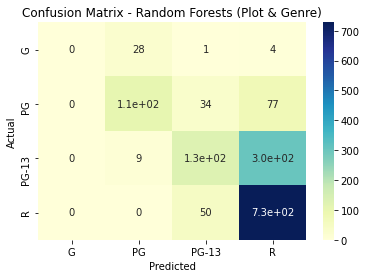

In [118]:
# Use Confusion Matrix to visualize
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, predictions_rf_genre)
df_cm = pd.DataFrame(cm, index=target_names, columns=target_names)

heatmap = sn.heatmap(df_cm, annot=True, cmap="YlGnBu")

plt.title("Confusion Matrix - Random Forests (Plot & Genre)")
plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.savefig('../../image_highlights/rating_random_forests/confusion_matrix_rf_with_genre.png')
plt.show()

In [119]:
# Check to see if the confusion matrix accounted for all predictions
total = 0
for column in df_cm.columns:
    total += df_cm[column].sum()
total

1474

In [120]:
len(y_test)

1474

# Save the Model

In [121]:
# Decision tree model
import joblib

filename = os.path.join('..', '..', 'saved_models','rating_decision_tree_with_genre.sav')
joblib.dump(dt_model_genre, filename)

['../saved_models/rating_decision_tree_with_genre.sav']

In [122]:
# Random forests model
filename = os.path.join('..', '..', 'saved_models','rating_random_forests_with_genre.sav')
joblib.dump(rf_model_genre, filename)

['../saved_models/rating_random_forests_with_genre.sav']

In [123]:
# # Tuned model
# filename = os.path.join('..', 'saved_models','rating_random_forests_with_genre_tuned.sav')
# joblib.dump(grid_rf_genre, filename)